In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import cv2
import mediapipe as mp

In [3]:
dftr = pd.read_csv('sign_mnist_train.csv')
dftr.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
dfte=pd.read_csv('sign_mnist_test.csv')
dfte.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


Prepping the Data

In [5]:
Xtrain = dftr.drop(columns='label')
ytrain = dftr['label']
Xtest = dfte.drop(columns='label')
ytest= dfte['label']

In [6]:
Xtrain, Xtest = Xtrain.to_numpy(), Xtest.to_numpy()

In [7]:
Xtrain = Xtrain.reshape(-1, 28, 28, 1)
Xtest = Xtest.reshape(-1, 28, 28, 1)
Xtrain, Xtest = Xtrain/255.0, Xtest/255.0

In [13]:
def createmodel(inputshape):
    model = Sequential([
        Flatten(input_shape=inputshape),
        Dense(128, activation='relu'),
        Dense(26, activation='softmax')
    ])
    return model

inputshape = (28,28,1)
model = createmodel(inputshape)
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,834 (405.60 KB)

 Trainable params: 103,834 (405.60 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    Xtrain, ytrain,
    batch_size = 32,
    epochs=10
)

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.2827 - loss: 2.5029
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.6260 - loss: 1.2385
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.7329 - loss: 0.9108
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.7992 - loss: 0.7035
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8395 - loss: 0.5638
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8705 - loss: 0.4646
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.8939 - loss: 0.3768
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9172 - loss: 0.3073
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9405 - loss: 0.2448
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.9525 - loss: 0.2019


In [26]:
loss, accuracy = model.evaluate(Xtest, ytest)
print(f'Loss: {loss:.2f}, Accuracy: {accuracy*100:.3f}%')


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6906 - loss: 1.0760
Loss: 1.05, Accuracy: 69.716%


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step


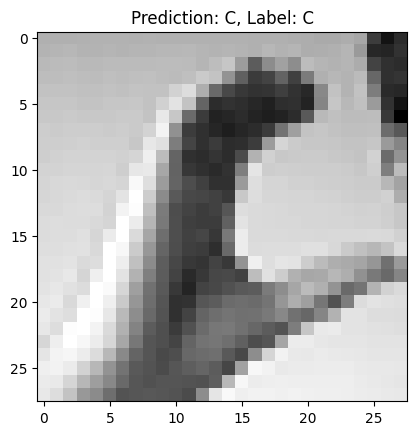

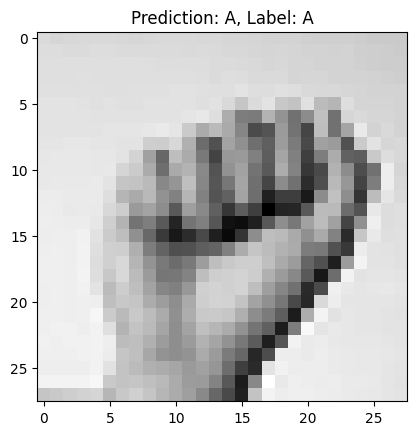

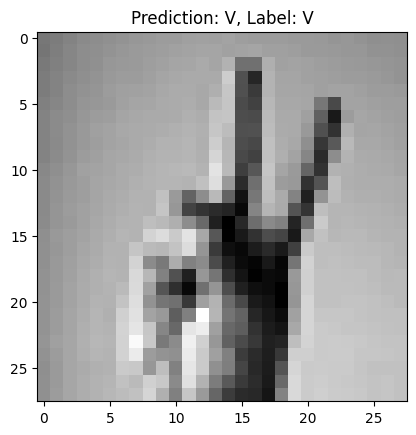

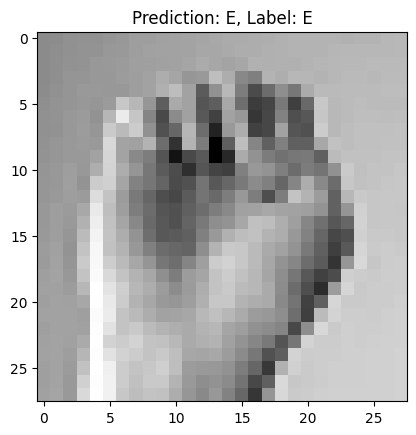

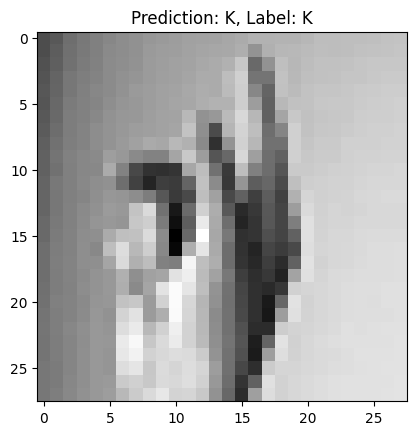

In [27]:
predictions = model.predict(Xtest)
predicted_labels = np.argmax(predictions, axis=1)
for i in range (20,25):  
    plt.imshow(Xtest[i], cmap='gray')
    plt.title(f"Prediction: {chr(65 + predicted_labels[i])}, Label: {chr(65 + ytest[i])}")

    plt.show()

In [ ]:
import cv2
import numpy as np
import mediapipe as mp

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

def preprocess_image_for_prediction(image, image_size=(28,28)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, image_size)
    normalized = resized.astype('float32') / 255.0
    reshaped = normalized.reshape(1, image_size[0], image_size[1], 1)
    return reshaped

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            h, w, _ = frame.shape
            x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * w)
            x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * w)
            y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * h)
            y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * h)

            hand = frame[y_min:y_max, x_min:x_max]

            if hand.size > 0:
                input_image = preprocess_image_for_prediction(hand)
                predictions = model.predict(input_image)
                prediction = np.argmax(predictions)

                label = f"Prediction: {chr(65+prediction)}"
                cv2.putText(frame, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_COMPLEX, 0.9, (255, 255, 255), 2)

            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    cv2.imshow("Hand Signal Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1736257834.322326 5170340 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1736257834.350631 5215810 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736257834.359452 5215810 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━